In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

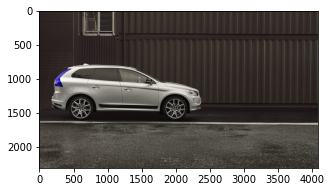

In [29]:
img = cv2.imread("data/car.jpg")
plt.figure(figsize = (5,5))
plt.imshow(img)

In [45]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [47]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

In [48]:
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [55]:
result_image.shape

(2305, 4096, 3)

In [ ]:
# Draw The Real Time Bounding Box 

In [34]:
def draw_bb(click, x, y, flag_param, parameters):
    global x_pt, y_pt, drawing, top_left_point, bottom_right_point, original_image  
    
    if click == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_pt, y_pt = x, y

    elif click == cv2.EVENT_MOUSEMOVE:
        if drawing:
            top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
            image[y_pt:y, x_pt:x] = 255 - original_image[y_pt:y, x_pt:x]
            cv2.rectangle(image, top_left_point, bottom_right_point, (0, 255, 0), 2)
    
    elif click == cv2.EVENT_LBUTTONUP:
        drawing = False
        top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
        image[y_pt:y, x_pt:x] = 255 - image[y_pt:y, x_pt:x]
        cv2.rectangle(image, top_left_point, bottom_right_point, (0, 255, 0), 2)
        bounding_box = (x_pt, y_pt, x-x_pt, y-y_pt)
        
        grabcut(original_image, bounding_box)

In [41]:
def grabcut(original_image, bounding_box):

    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    segment[y:y+height, x:x+width] = 1

    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv2.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5, cv2.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')

    original_image = original_image*new_mask[:,:,np.newaxis]

    cv2.imshow('Result', original_image)

In [42]:
drawing = False
top_left_point, bottom_right_point = (-1,-1), (-1,-1)

original_image = cv2.imread("data/World.jpg")
original_image = cv2.resize( original_image , dsize = (500,500))
image = original_image.copy()
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', draw_bb)

cv2.imshow('Frame', image)
c = cv2.waitKey(0)
cv2.destroyAllWindows()